Model Preparation and Training

In [ ]:

#Model Architechture:
#  Convolutional Layer  ->  Max Pooling Layer  ->  Convolutional Layer  ->
#  Flatten  ->  Dense Layer  ->  Dense Layer  ->  Output Layer

# Activation Function: ReLU
# Optimizer : Adam
# Loss: Sparse Categorical Crossentropy


model= tf.keras.Sequential()
conv_layer=tf.keras.layers.Conv2D(
    128, 
    kernel_size=(4,4), 
    strides=(1,1), 
    padding="same", 
    activation="relu",
    input_shape=(128,128,1)
    )  

max_pooling_layer=tf.keras.layers.MaxPooling2D((2,2))

conv_layer2=tf.keras.layers.Conv2D(
    64,  
    kernel_size=(4,4), 
    strides=(1,1), 
    padding="same", 
    activation="relu")  


model.add(conv_layer)
model.add(max_pooling_layer)
model.add(conv_layer2)


In [26]:
flatten=tf.keras.layers.Flatten()
model.add(flatten)

dense_layer=tf.keras.layers.Dense(32, activation="relu")
model.add(dense_layer)
dense_layer2=tf.keras.layers.Dense(32, activation="relu")
model.add(dense_layer2)

output_layer=tf.keras.layers.Dense(10, activation="softmax")
model.add(output_layer)

In [27]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy", metrics="accuracy")

In [28]:
x_train = np.array([np.array(val) for val in x_train])

results=model.fit(x_train , y_train ,
                  batch_size=128,
                  epochs=5,
                  validation_data=(x_val, y_val))

Epoch 1/5
55/55 [==============================] - 190s 3s/step - loss: 1.6502 - accuracy: 0.4196 - val_loss: 1.1947 - val_accuracy: 0.6082
Epoch 2/5
55/55 [==============================] - 199s 4s/step - loss: 0.9355 - accuracy: 0.7014 - val_loss: 0.8819 - val_accuracy: 0.7056
Epoch 3/5
55/55 [==============================] - 191s 3s/step - loss: 0.6192 - accuracy: 0.8059 - val_loss: 0.7570 - val_accuracy: 0.7892
Epoch 4/5
55/55 [==============================] - 198s 4s/step - loss: 0.4333 - accuracy: 0.8654 - val_loss: 0.6483 - val_accuracy: 0.8213
Epoch 5/5
55/55 [==============================] - 204s 4s/step - loss: 0.2957 - accuracy: 0.9031 - val_loss: 0.6709 - val_accuracy: 0.8121


Loss & Accuray Graphics

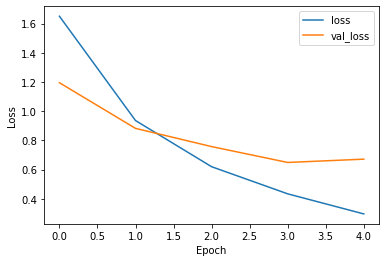

In [30]:
plt.plot(results.history["loss"],label="loss")
plt.plot(results.history["val_loss"],label="val_loss")

plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.legend()

plt.show()

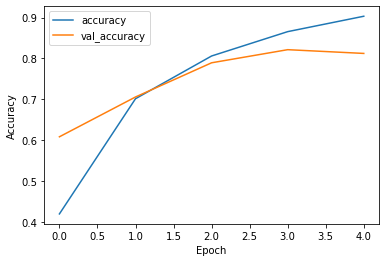

In [31]:
plt.plot(results.history["accuracy"],label="accuracy")
plt.plot(results.history["val_accuracy"],label="val_accuracy")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.legend()

plt.show()